In [31]:
% matplotlib inline
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = 10,10
import numpy as np
import pandas as pd
from scipy import stats
from sklearn import datasets
import statsmodels.api as sm
import patsy


In [3]:
boston = datasets.load_boston()
df = pd.DataFrame(boston.data, columns=boston.feature_names)

df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [4]:
print boston.DESCR

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

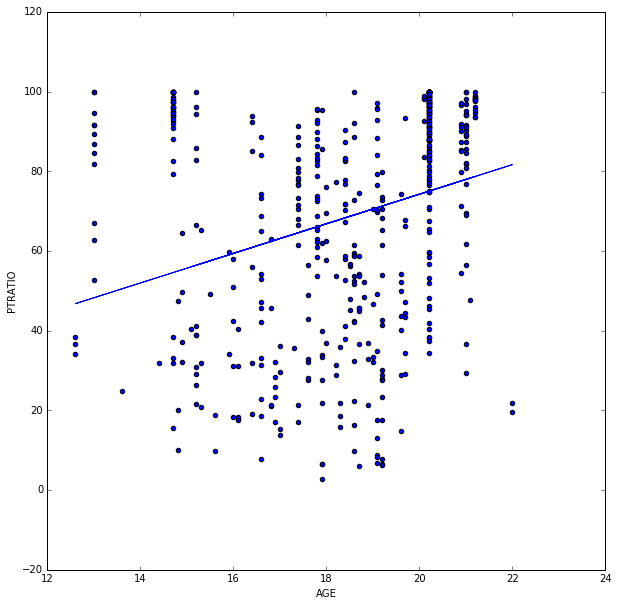

In [13]:
x = df[['PTRATIO']]
y = df['AGE']

model = sm.OLS(y, x).fit()
predictions = model.predict(x)
plt.plot(x, predictions)
plt.scatter(x,y)
plt.xlabel('AGE')
plt.ylabel('PTRATIO')
# plt.line()

In [28]:
for i in df.columns:
    for j in df.columns:
        if i != j:
            print i, " x ", j
            x = df[i]
            y = df[j]
            model = sm.OLS(y, x).fit()
            print model.rsquared


CRIM  x  ZN
1.47312931812e-05
CRIM  x  INDUS
0.274897661366
CRIM  x  CHAS
0.00273625994934
CRIM  x  NOX
0.208448096727
CRIM  x  RM
0.130400394665
CRIM  x  AGE
0.230332007451
CRIM  x  DIS
0.0284280276577
CRIM  x  RAD
0.451293020521
CRIM  x  TAX
0.31438942058
CRIM  x  PTRATIO
0.171679657896
CRIM  x  B
0.0827952120041
CRIM  x  LSTAT
0.292830573578
ZN  x  CRIM
1.47312931812e-05
ZN  x  INDUS
0.0148511557616
ZN  x  CHAS
0.00612552794867
ZN  x  NOX
0.111729404188
ZN  x  RM
0.217884212526
ZN  x  AGE
0.0446746741167
ZN  x  DIS
0.452814233279
ZN  x  RAD
0.0182953483355
ZN  x  TAX
0.0884774766361
ZN  x  PTRATIO
0.155558526185
ZN  x  B
0.215092889829
ZN  x  LSTAT
0.0398180838715
INDUS  x  CRIM
0.274897661366
INDUS  x  ZN
0.0148511557616
INDUS  x  CHAS
0.0654393482285
INDUS  x  NOX
0.838061029971
INDUS  x  RM
0.678323674868
INDUS  x  AGE
0.839401144987
INDUS  x  DIS
0.319188676077
INDUS  x  RAD
0.705004171258
INDUS  x  TAX
0.86741074013
INDUS  x  PTRATIO
0.755583653556
INDUS  x  B
0.606457865419
IN

In [12]:
model.summary()



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    AGE   R-squared:                       0.866
Model:                            OLS   Adj. R-squared:                  0.866
Method:                 Least Squares   F-statistic:                     3258.
Date:                Wed, 12 Oct 2016   Prob (F-statistic):          2.16e-222
Time:                        12:05:52   Log-Likelihood:                -2388.5
No. Observations:                 506   AIC:                             4779.
Df Residuals:                     505   BIC:                             4783.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
PTRATIO        3.7114      0.065     57.081      0.000         3.584     3.839
==============================================================================
Omnibus:                       41.172   Durbin-Watson:                   0.414
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               29.213
Skew:                          -0.478   Prob(JB):                     4.53e-07
Kurtosis:                       2.312   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [29]:
(1,2) == (2,1)

False

In [30]:
for i in df.columns:
    print "CRIM", " x ", i
    x = df[i]
    y = df['CRIM']
    model = sm.OLS(y, x).fit()
    print model.rsquared

CRIM  x  CRIM
1.0
CRIM  x  ZN
1.47312931812e-05
CRIM  x  INDUS
0.274897661366
CRIM  x  CHAS
0.00273625994934
CRIM  x  NOX
0.208448096727
CRIM  x  RM
0.130400394665
CRIM  x  AGE
0.230332007451
CRIM  x  DIS
0.0284280276577
CRIM  x  RAD
0.451293020521
CRIM  x  TAX
0.31438942058
CRIM  x  PTRATIO
0.171679657896
CRIM  x  B
0.0827952120041
CRIM  x  LSTAT
0.292830573578


In [34]:
y, x = patsy.dmatrices("CRIM ~ LSTAT + TAX + RAD", data=df)
crime = sm.OLS(y, x).fit()
crime.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   CRIM   R-squared:                       0.416
Model:                            OLS   Adj. R-squared:                  0.413
Method:                 Least Squares   F-statistic:                     119.2
Date:                Wed, 12 Oct 2016   Prob (F-statistic):           2.69e-58
Time:                        12:39:06   Log-Likelihood:                -1670.0
No. Observations:                 506   AIC:                             3348.
Df Residuals:                     502   BIC:                             3365.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     -3.9334      1.108     -3.552      0.000        -6.109    -1.757
LSTAT          0.2403      0.049      4.911      0.000         0.144     0.336
TAX           -0.0019      0.004     -0.437      0.662        -0.010     0.007
RAD            0.5515      0.081      6.781      0.000         0.392     0.711
==============================================================================
Omnibus:                      675.378   Durbin-Watson:                   1.448
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            87620.159
Skew:                           6.777   Prob(JB):                         0.00
Kurtosis:                      66.025   Cond. No.                     1.67e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.67e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [37]:
y, x = patsy.dmatrices("CRIM ~ LSTAT + RAD", data=df)
crime2 = sm.OLS(y, x).fit()
crime2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   CRIM   R-squared:                       0.416
Model:                            OLS   Adj. R-squared:                  0.413
Method:                 Least Squares   F-statistic:                     179.0
Date:                Wed, 12 Oct 2016   Prob (F-statistic):           1.96e-59
Time:                        12:39:48   Log-Likelihood:                -1670.1
No. Observations:                 506   AIC:                             3346.
Df Residuals:                     503   BIC:                             3359.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     -4.3402      0.601     -7.222      0.000        -5.521    -3.159
LSTAT          0.2345      0.047      4.986      0.000         0.142     0.327
RAD            0.5202      0.039     13.488      0.000         0.444     0.596
==============================================================================
Omnibus:                      675.165   Durbin-Watson:                   1.445
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            87473.016
Skew:                           6.773   Prob(JB):                         0.00
Kurtosis:                      65.971   Cond. No.                         38.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

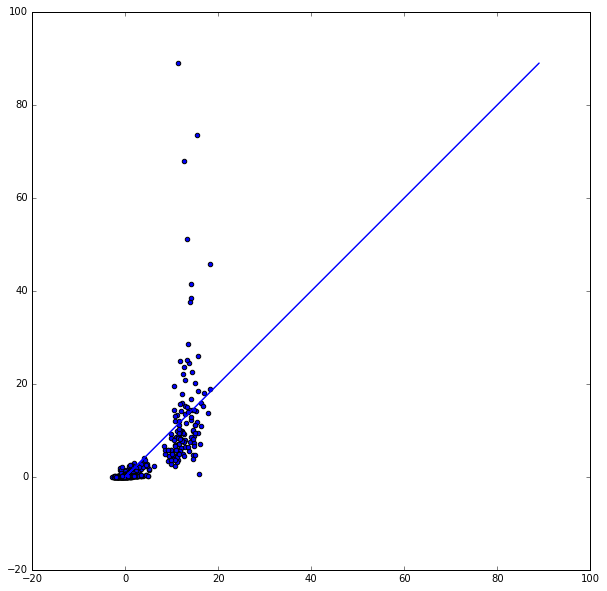

In [48]:
y, x = patsy.dmatrices("CRIM ~ LSTAT + B + RAD ", data=df)
crimeMax = sm.OLS(y, x).fit()
crimeMax.summary()
predictions = crimeMax.predict(x)
plt.scatter(predictions, y)
plt.plot(y,y)


In [49]:
crimeMax.summary()



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   CRIM   R-squared:                       0.422
Model:                            OLS   Adj. R-squared:                  0.419
Method:                 Least Squares   F-statistic:                     122.4
Date:                Wed, 12 Oct 2016   Prob (F-statistic):           1.66e-59
Time:                        12:48:12   Log-Likelihood:                -1667.2
No. Observations:                 506   AIC:                             3342.
Df Residuals:                     502   BIC:                             3359.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     -0.6336      1.649     -0.384      0.701        -3.874     2.607
LSTAT          0.2126      0.048      4.459      0.000         0.119     0.306
B             -0.0088      0.004     -2.411      0.016        -0.016    -0.002
RAD            0.4881      0.041     12.018      0.000         0.408     0.568
==============================================================================
Omnibus:                      675.810   Durbin-Watson:                   1.453
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            90348.770
Skew:                           6.769   Prob(JB):                         0.00
Kurtosis:                      67.047   Cond. No.                     2.09e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.09e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""